In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#import data matrix
fpath = '../saved_data/week1_cycle1/demeaned_data_matrix_first_cycle_week1'
df = pd.read_csv(fpath, sep=',', header=0)

In [3]:
# slice the df into X and y
col_list = df.columns

X = df[col_list[1:]]
y = df[col_list[0]]; y = y+273.15

<AxesSubplot:>

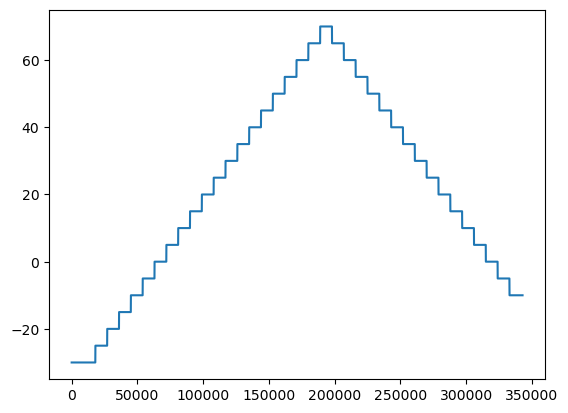

In [4]:
df[col_list[0]].plot()

In [5]:
idx = 4499 + 188979

In [6]:
y[idx]

343.15

In [7]:
X_up, X_down = X[:idx], X[idx:]
y_up, y_down = y[:idx], y[idx:]

<AxesSubplot:>

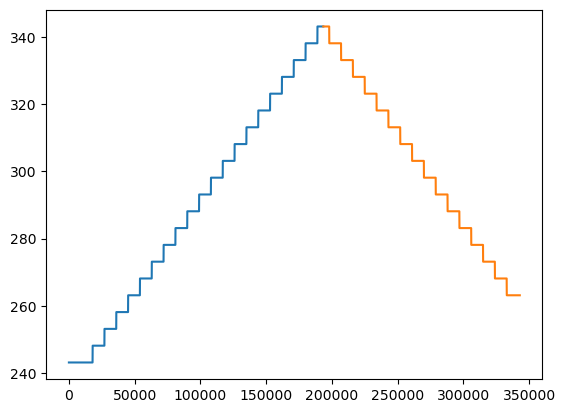

In [8]:
y_up.plot()
y_down.plot()

In [9]:
# specify the number of componenets
n_comps = 10
# # Create a Dask PCA object
pca_up = PCA(n_components=n_comps, svd_solver='auto')

# Fit the PCA model
pca_up.fit_transform(X_up) 

array([[-3.75340782e+04,  6.90529659e+04, -3.78567510e+03, ...,
        -3.98044185e+02, -9.89962145e+02,  5.82086582e+02],
       [-3.16454015e+04,  6.60482271e+04, -3.82282723e+03, ...,
        -6.69593951e+02, -6.30672330e+02,  7.28660714e+01],
       [-2.89058883e+04,  6.44209687e+04, -3.58383344e+03, ...,
         6.50206128e+01, -4.45684563e+02,  3.36268761e+02],
       ...,
       [-8.44704074e+04, -1.00448041e+04, -2.45744179e+02, ...,
         5.91468094e+02, -7.98164873e+02, -5.10415618e+02],
       [-8.63857256e+04, -8.74442025e+03, -2.62880166e+02, ...,
         2.63940039e+02, -1.01022827e+02, -1.99871032e+02],
       [-8.04216181e+04, -1.23256266e+04, -5.27569811e+02, ...,
         3.86861023e+02, -5.82702947e+02, -8.90185962e+01]])

In [10]:
# specify the number of componenets
n_comps = 10
# # Create a Dask PCA object
pca_down = PCA(n_components=n_comps, svd_solver='auto')

# Fit the PCA model
pca_down.fit_transform(X_down) 

array([[-8.16665686e+04,  4.50463691e+03, -8.79874271e+02, ...,
        -3.65910961e+02, -1.76047627e+02,  3.39339481e+02],
       [-8.17589577e+04,  4.58521735e+03, -1.01238239e+03, ...,
         1.32405029e+02, -2.25762604e+02,  4.22688967e+02],
       [-8.21610068e+04,  4.41228007e+03, -1.54367902e+03, ...,
        -5.58872842e+02,  2.76377293e+02, -1.45502137e+02],
       ...,
       [ 6.76358008e+04,  6.56774256e+03, -2.73265040e+03, ...,
        -1.11979441e+02, -2.04244766e+02, -2.23708487e+02],
       [ 6.07033447e+04,  1.00415200e+04, -4.04752486e+02, ...,
        -2.82343942e+02,  1.01806261e+02, -3.11064390e+01],
       [ 6.10375395e+04,  9.70553426e+03, -2.60543587e+02, ...,
        -5.30215632e+01,  5.75841446e+02, -8.56358716e+01]])

In [11]:
# specify the number of componenets
n_comps = 10
# # Create a Dask PCA object
pca_all = PCA(n_components=n_comps, svd_solver='auto')

# Fit the PCA model
pca_all.fit_transform(X) 

array([[-3.23161453e+04,  7.36889566e+04,  3.97876635e+03, ...,
        -1.65974156e+03,  3.83618941e+02,  1.61569256e+02],
       [-2.65811956e+04,  7.04479898e+04,  3.41256779e+03, ...,
        -7.77356314e+02,  3.38685537e+02,  2.42959820e+02],
       [-2.39178114e+04,  6.86974460e+04,  3.46249953e+03, ...,
        -4.35239541e+02, -1.46450391e+02,  5.58851994e+01],
       ...,
       [ 6.47209346e+04,  2.22594771e+03,  3.72257877e+03, ...,
        -8.13720586e+02, -9.81584146e+02, -6.73915181e+02],
       [ 5.77375783e+04,  6.25281343e+03,  4.30567902e+03, ...,
        -1.01364248e+03, -5.80356198e+02, -2.40707532e+02],
       [ 5.80710592e+04,  6.00126875e+03,  4.53005782e+03, ...,
        -1.34451126e+03, -4.87675532e+02, -5.56049173e+02]])

In [12]:
# Get explained variance ratio
explained_variance_ratio_up = pca_up.explained_variance_ratio_
explained_variance_ratio_down = pca_down.explained_variance_ratio_
explained_variance_ratio_all = pca_all.explained_variance_ratio_

In [13]:
export_name = '../saved_data/sensor_2_week1_ramp_split_scree_plot.png'

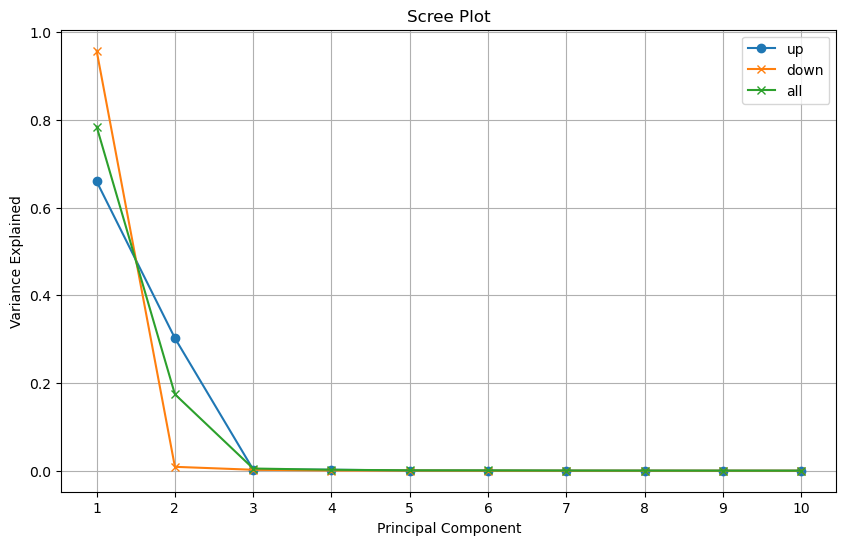

In [14]:
# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_up) + 1), explained_variance_ratio_up, marker='o')
plt.plot(range(1, len(explained_variance_ratio_down) + 1), explained_variance_ratio_down, marker='x')
plt.plot(range(1, len(explained_variance_ratio_all) + 1), explained_variance_ratio_all, marker='x')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio_up) + 1))
plt.legend(['up', 'down', 'all'])
plt.grid()
plt.savefig(export_name, dpi=700)
plt.show()

In [15]:
x_label = X_up.columns.astype('float')

In [16]:
export_name = '../saved_data/sensor_2_eigenmode_comparison_mode_{}.png'

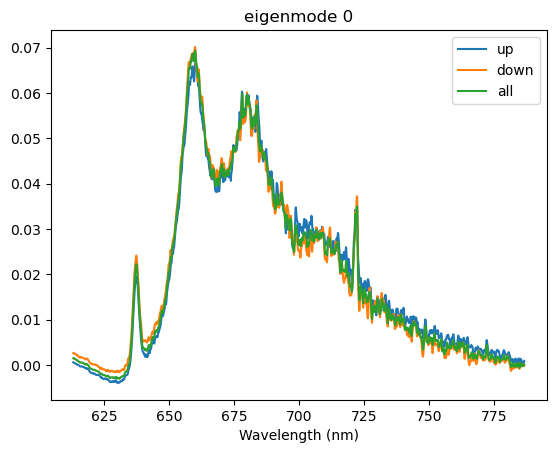

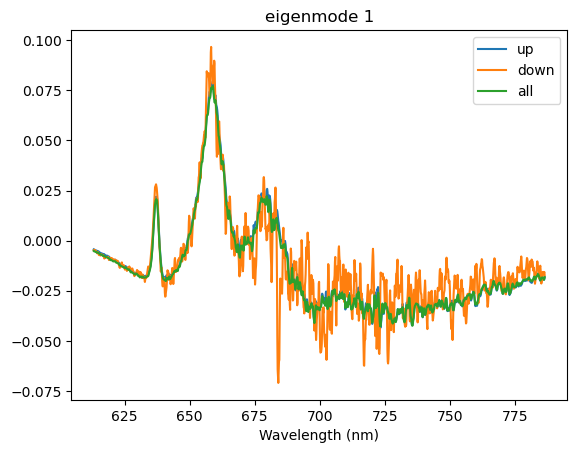

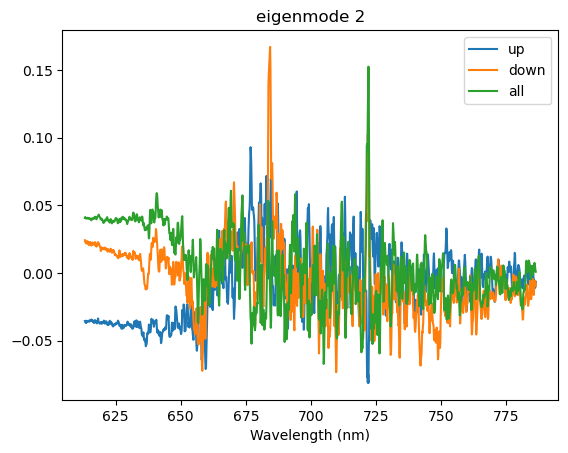

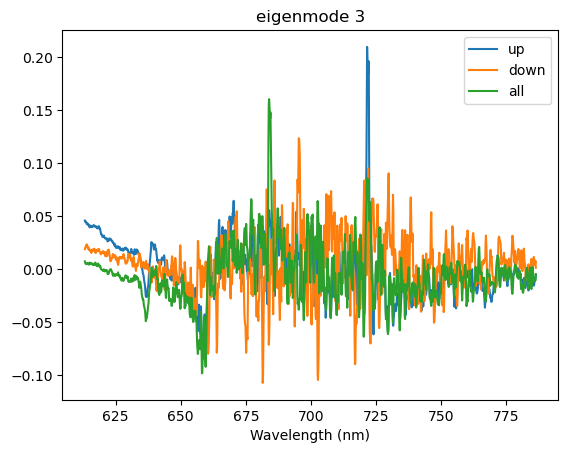

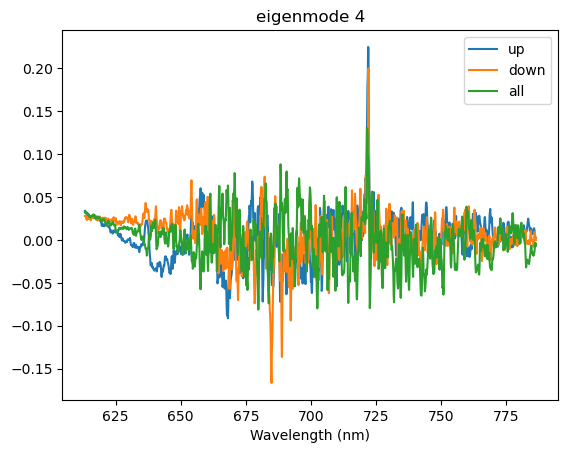

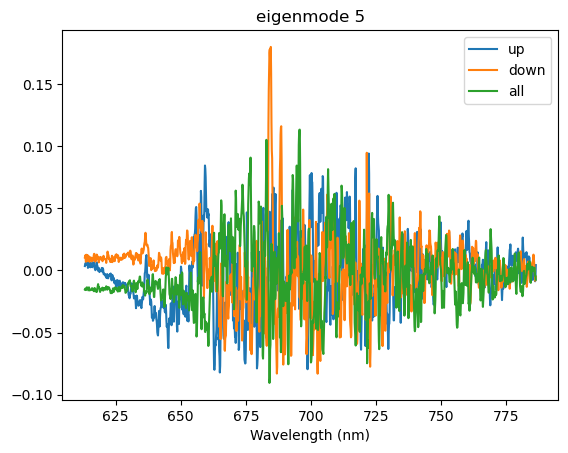

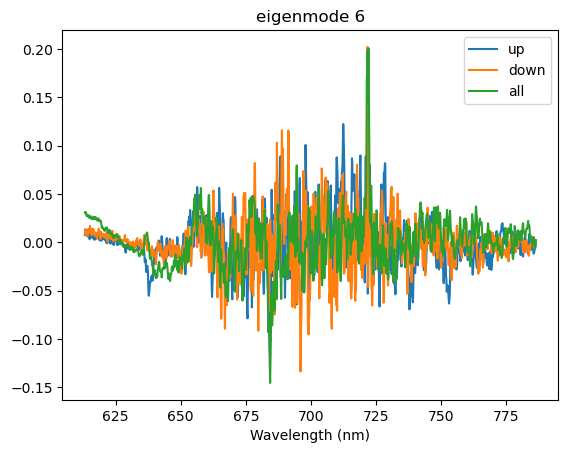

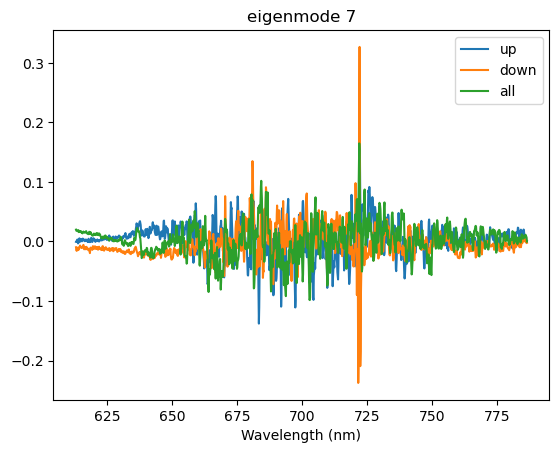

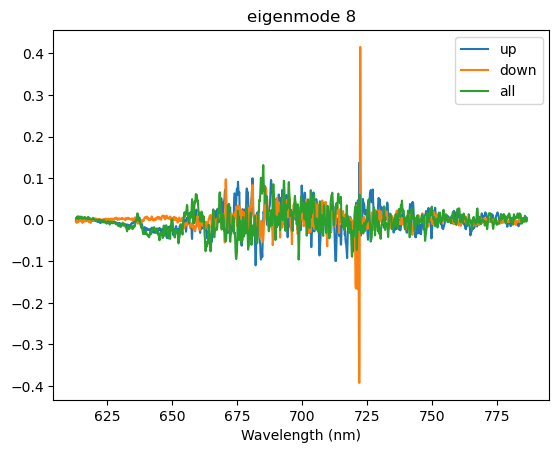

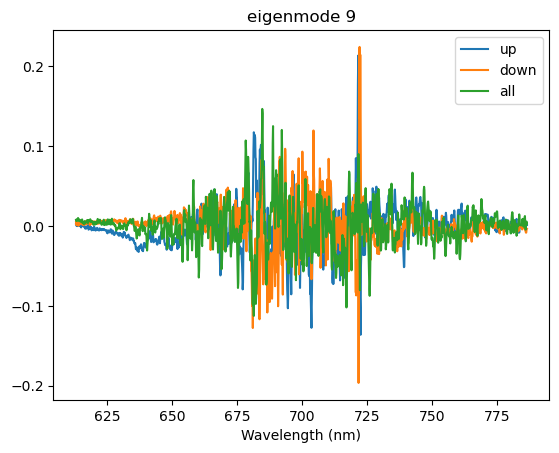

In [17]:
# plot each of the components
for i in range(n_comps):
    plt.plot(x_label.values, pca_up.components_.T[:,i]); 
    plt.plot(x_label.values, pca_down.components_.T[:,i] )
    plt.plot(x_label.values, pca_all.components_.T[:,i] )
    plt.title('eigenmode {}'.format(i))
    plt.xlabel('Wavelength (nm)')
    plt.legend(['up', 'down', 'all'])
    plt.savefig(export_name.format(i), dpi=700)
    plt.show()

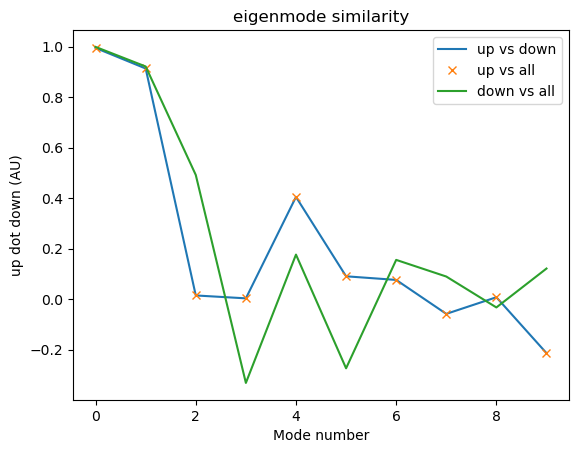

In [22]:
# plot each of the components
mode_num, score_up_down, score_up_all, score_down_all = [],[], [], []
for i in range(n_comps):
    mode_num.append(i)
    score_up_down_ = pca_up.components_.T[:,i] @ pca_down.components_.T[:,i]
    score_up_all_ = pca_up.components_.T[:,i] @ pca_all.components_.T[:,i]
    score_down_all_ = pca_down.components_.T[:,i] @ pca_all.components_.T[:,i]
    score_up_down.append(score_up_down_)
    score_up_all.append(score_up_down_)
    score_down_all.append(score_down_all_)

plt.plot(mode_num, score_up_down) 
plt.plot(mode_num,score_up_all, 'x')  
plt.plot(mode_num, score_down_all)    
plt.title('eigenmode similarity')
plt.xlabel('Mode number')
plt.ylabel('up dot down (AU)')
plt.legend(['up vs down', 'up vs all', 'down vs all'])
plt.savefig('../saved_data/dot_product_scores.png', dpi=700)
plt.show()

In [23]:
df_out = pd.DataFrame(list(zip(mode_num, score_up_down, score_up_all, score_down_all)))
df_out.columns = ['mode_number', 'up_down_dot_score', 'up_all_dot_score', 'down_all_dot_score']

In [24]:
df_out.to_csv('../saved_data_dot_product_scores')

In [25]:
loadings_up = (X@pca_up.components_.T)
loadings_down = (X@pca_down.components_.T)
loadings_all = (X@pca_all.components_.T)

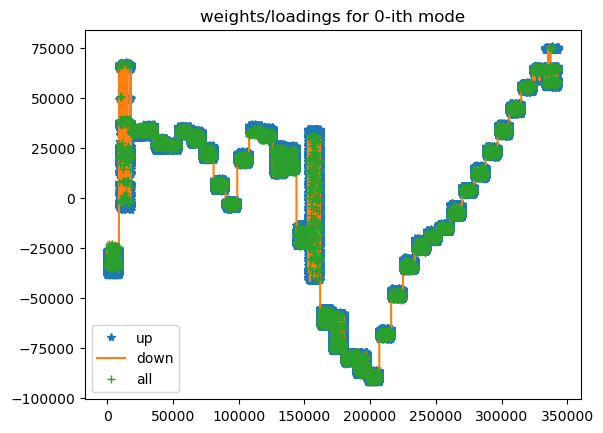

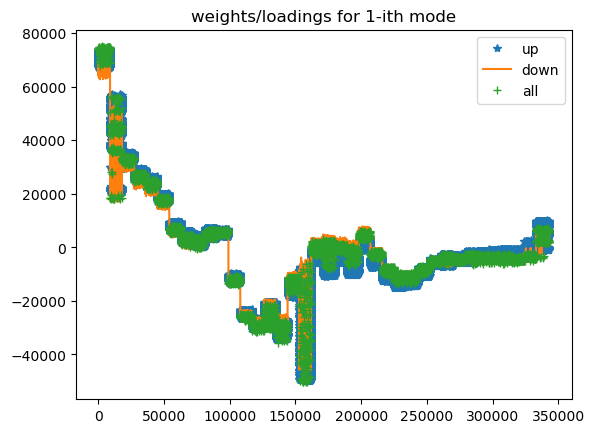

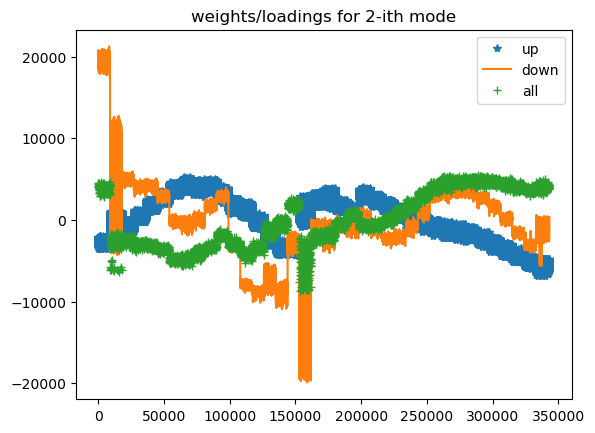

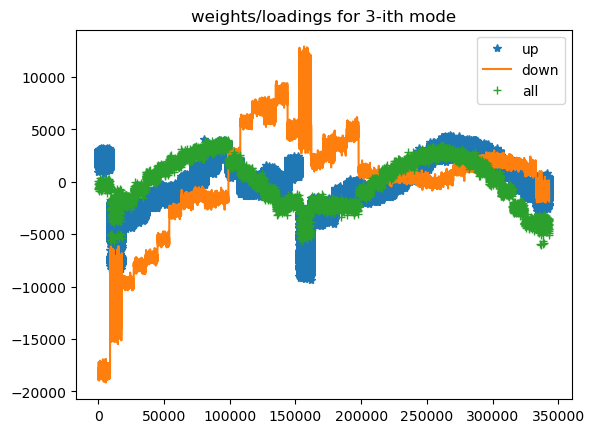

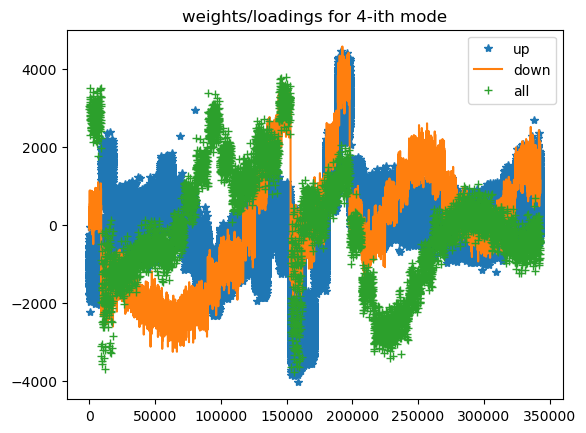

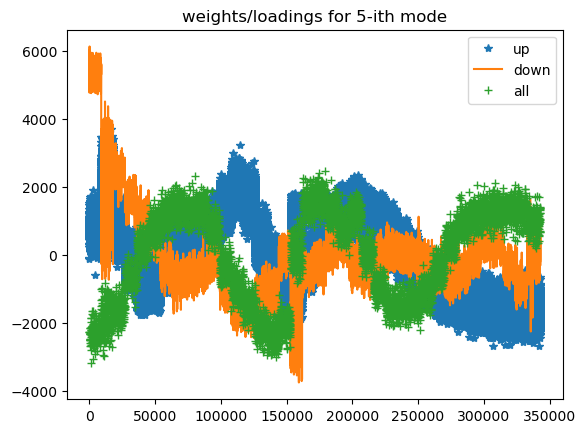

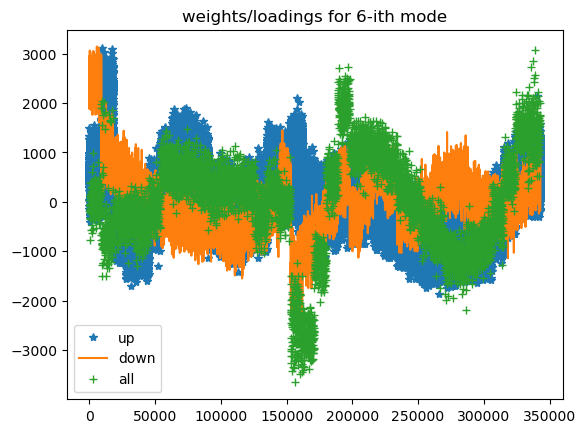

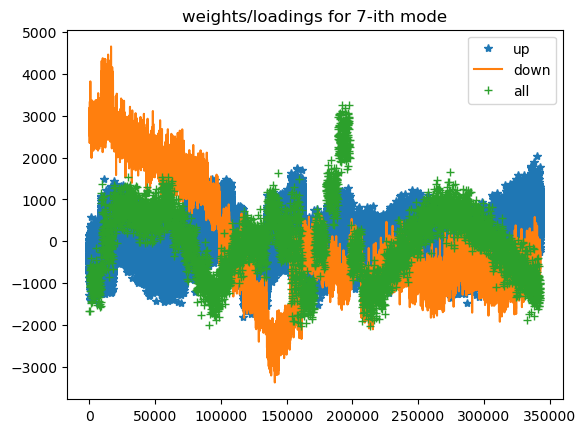

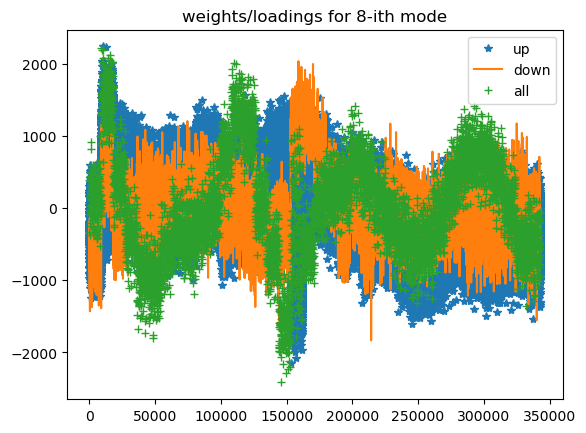

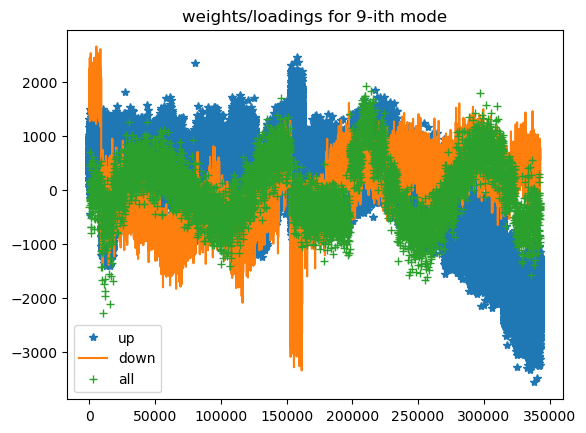

In [50]:
for i in range(n_comps):
    plt.plot(loadings_up.iloc[:, i], '*')
    plt.plot(loadings_down.iloc[::30, i], '-')
    plt.plot(loadings_all.iloc[::50, i], '+')
    plt.legend(['up', 'down', 'all'])
    plt.title('weights/loadings for {}-ith mode'.format(i))
    plt.savefig('../saved_data/loadings_for_mode_{}.png'.format((i)))
    plt.show()